# **Binary Classification ANN**

In [2]:
from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [3]:
dataset=pd.read_csv("diabetes2.csv")

In [4]:
dataset.isnull().any()
dataset.fillna(method="ffill")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
x=dataset[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y=dataset["Outcome"].values

In [6]:
model=Sequential([
    Dense(12,input_shape=(8,),activation='relu'),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history=model.fit(x,y,validation_split=0.4,epochs=250,batch_size=20)

Epoch 1/250
23/23 [==============================] - 2s 21ms/step - loss: 3.4525 - accuracy: 0.5326 - val_loss: 2.4808 - val_accuracy: 0.5649
Epoch 2/250
23/23 [==============================] - 0s 6ms/step - loss: 2.6938 - accuracy: 0.5283 - val_loss: 2.2532 - val_accuracy: 0.5390
Epoch 3/250
23/23 [==============================] - 0s 6ms/step - loss: 2.3360 - accuracy: 0.5478 - val_loss: 1.6930 - val_accuracy: 0.6429
Epoch 4/250
23/23 [==============================] - 0s 6ms/step - loss: 1.9514 - accuracy: 0.5413 - val_loss: 1.4436 - val_accuracy: 0.5974
Epoch 5/250
23/23 [==============================] - 0s 7ms/step - loss: 1.5436 - accuracy: 0.5457 - val_loss: 1.0808 - val_accuracy: 0.6883
Epoch 6/250
23/23 [==============================] - 0s 8ms/step - loss: 1.2966 - accuracy: 0.5630 - val_loss: 0.9232 - val_accuracy: 0.6981
Epoch 7/250
23/23 [==============================] - 0s 6ms/step - loss: 1.1456 - accuracy: 0.6130 - val_loss: 0.8706 - val_accuracy: 0.7240
Epoch 8/250


In [9]:
_, accuracy=model.evaluate(x,y)
print('Accuracy:%.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7565
Accuracy:75.65


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


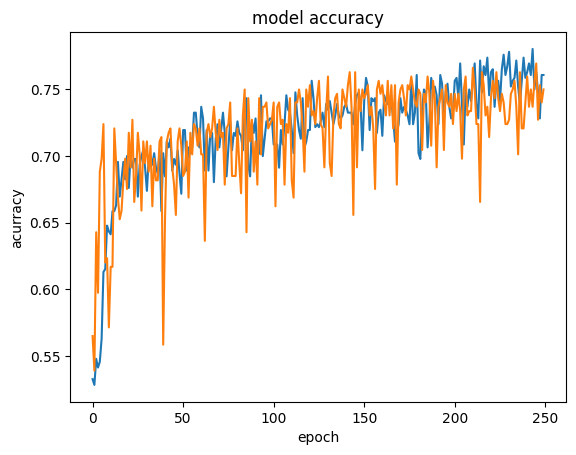

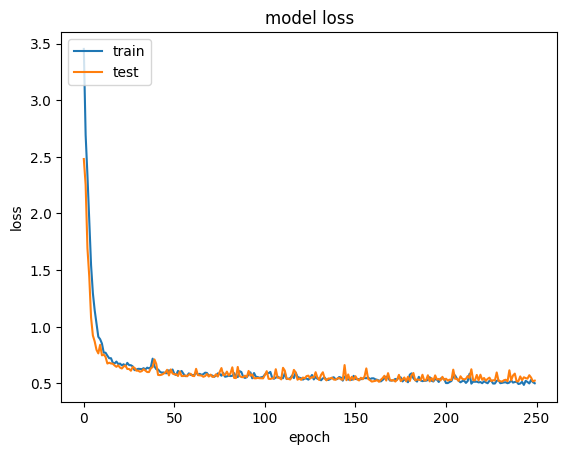

In [10]:
import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acurracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
